In [7]:
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#df = pd.read_csv('Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
#df.index.freq = 'MS'

In [9]:
df = pd.read_csv('Data/HospitalityEmployees.csv')

In [10]:
from fbprophet import Prophet

In [11]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


## Format the Data

In [11]:
df.columns = ['ds','y']

In [30]:
df['ds'] = pd.to_datetime(df['ds'])

## Train/Test Split

In [31]:
len(df)

348

In [32]:
len(df) - 12

336

In [47]:
train = df.iloc[:336]
test = df.iloc[336:]

In [48]:
test

,ds,y
336,2018-01-01,1916.8
337,2018-02-01,1944.5
338,2018-03-01,1962.2
339,2018-04-01,1984.9
340,2018-05-01,2001.5
341,2018-06-01,2015.3
342,2018-07-01,2022.1
343,2018-08-01,2019.1
344,2018-09-01,1992.5
345,2018-10-01,1984.3


## Create and Fit Model

In [65]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html

In [66]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

In [67]:
df.tail()

,ds,y
343,2018-08-01,2019.1
344,2018-09-01,1992.5
345,2018-10-01,1984.3
346,2018-11-01,1990.1
347,2018-12-01,2000.2


In [68]:
future.tail()

,ds
343,2018-08-01
344,2018-09-01
345,2018-10-01
346,2018-11-01
347,2018-12-01


### Step 2: Predict and fill in the Future

In [69]:
forecast = m.predict(future)

In [70]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
343,2018-08-01,2046.402011,2076.181850,2098.271635,2041.527553,2051.284217,0.020101,0.020101,0.020101,0.020101,0.020101,0.020101,0.0,0.0,0.0,2087.536336
344,2018-09-01,2052.510993,2058.630577,2082.922121,2046.397020,2058.657392,0.008942,0.008942,0.008942,0.008942,0.008942,0.008942,0.0,0.0,0.0,2070.863534
345,2018-10-01,2058.422912,2041.080602,2065.534162,2051.058482,2066.162562,-0.002868,-0.002868,-0.002868,-0.002868,-0.002868,-0.002868,0.0,0.0,0.0,2052.520364
346,2018-11-01,2064.531895,2033.340582,2060.239849,2055.687962,2073.795383,-0.008623,-0.008623,-0.008623,-0.008623,-0.008623,-0.008623,0.0,0.0,0.0,2046.728785
347,2018-12-01,2070.443813,2044.523987,2072.374498,2059.854751,2081.321999,-0.005701,-0.005701,-0.005701,-0.005701,-0.005701,-0.005701,0.0,0.0,0.0,2058.640474


In [71]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [72]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2018-01-01,1940.469372,1931.459530,1949.492517
337,2018-02-01,1966.448493,1957.551843,1975.866264
338,2018-03-01,1991.919531,1982.344100,2001.806734
339,2018-04-01,2019.471920,2009.659920,2028.868459
340,2018-05-01,2048.233730,2038.738333,2057.904680
341,2018-06-01,2073.019621,2062.537038,2082.985420
342,2018-07-01,2080.074636,2069.617270,2090.447022
343,2018-08-01,2087.536336,2076.181850,2098.271635
344,2018-09-01,2070.863534,2058.630577,2082.922121
345,2018-10-01,2052.520364,2041.080602,2065.534162


### Plotting Forecast

We can use Prophet's own built in plotting tools

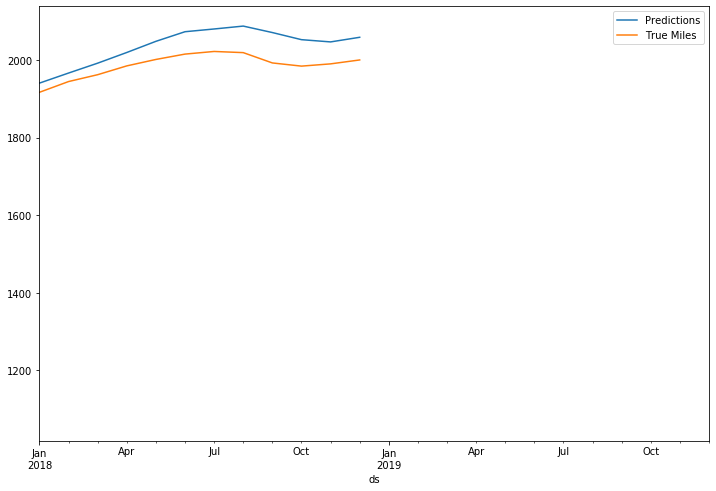

In [73]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-12-01'))

### Forecast Evaluations

In [74]:
from statsmodels.tools.eval_measures import rmse

In [75]:
predictions = forecast.iloc[-12:]['yhat']

In [76]:
predictions

336    1940.469372
337    1966.448493
338    1991.919531
339    2019.471920
340    2048.233730
341    2073.019621
342    2080.074636
343    2087.536336
344    2070.863534
345    2052.520364
346    2046.728785
347    2058.640474
Name: yhat, dtype: float64

In [77]:
test['y']

336    1916.8
337    1944.5
338    1962.2
339    1984.9
340    2001.5
341    2015.3
342    2022.1
343    2019.1
344    1992.5
345    1984.3
346    1990.1
347    2000.2
Name: y, dtype: float64

In [78]:
rmse(predictions,test['y'])

53.30540959394743

In [79]:
test.mean()

y    1986.125
dtype: float64

### Retrain the model on the full data and forecast one year into the future

In [80]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

In [82]:
forecast = m.predict(future)

In [83]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
348,2019-01-01,1982.761391,1970.183543,1995.637041
349,2019-02-01,2009.801362,1996.674678,2023.667247
350,2019-03-01,2028.773724,2014.890770,2041.976736
351,2019-04-01,2058.513309,2045.345777,2071.556206
352,2019-05-01,2088.054501,2074.586711,2100.662924
353,2019-06-01,2113.166439,2099.028452,2127.203698
354,2019-07-01,2119.042760,2104.656766,2132.154481
355,2019-08-01,2124.501158,2110.176407,2139.028616
356,2019-09-01,2106.606745,2092.329490,2120.912103
357,2019-10-01,2087.430674,2071.417097,2101.062982
